In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris = load_iris()

In [2]:
# Load data into a DataFrame
df = pd.DataFrame(iris.data, columns=iris.feature_names)
# Convert datatype to float
df = df.astype(float)
# append "target" and name it "label"
df['label'] = iris.target
# Use string label instead
df['label'] = df.label.replace(dict(enumerate(iris.target_names)))

In [3]:
df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# label -> one-hot encoding
label = pd.get_dummies(df['label'], prefix='label')
df = pd.concat([df, label], axis=1)
# drop old label
df.drop(['label'], axis=1, inplace=True)

In [5]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label_setosa,label_versicolor,label_virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [6]:
# Creating X and y
X = df[['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']]
# Convert DataFrame into np array
X = np.asarray(X)
y = df[['label_setosa', 'label_versicolor', 'label_virginica']]
# Convert DataFrame into np array
y = np.asarray(y)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(
  X,
  y,
  test_size=0.20
)

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_model(): 
    model = Sequential([
        Dense(64, activation='relu', input_shape=(4,)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax')
    ])
    model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)
    history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)
    return model

In [9]:
model = create_model()

Epoch 1/200
3/3 - 0s - loss: 1.0809 - accuracy: 0.4444 - val_loss: 1.0150 - val_accuracy: 0.8667
Epoch 2/200
3/3 - 0s - loss: 0.9827 - accuracy: 0.7889 - val_loss: 0.9413 - val_accuracy: 0.6000
Epoch 3/200
3/3 - 0s - loss: 0.8739 - accuracy: 0.7333 - val_loss: 0.8484 - val_accuracy: 0.6000
Epoch 4/200
3/3 - 0s - loss: 0.7511 - accuracy: 0.7333 - val_loss: 0.7268 - val_accuracy: 0.6000
Epoch 5/200
3/3 - 0s - loss: 0.6090 - accuracy: 0.7333 - val_loss: 0.5660 - val_accuracy: 1.0000
Epoch 6/200
3/3 - 0s - loss: 0.4628 - accuracy: 0.9333 - val_loss: 0.4377 - val_accuracy: 0.9667
Epoch 7/200
3/3 - 0s - loss: 0.3530 - accuracy: 0.9444 - val_loss: 0.3474 - val_accuracy: 0.9667
Epoch 8/200
3/3 - 0s - loss: 0.2733 - accuracy: 0.9556 - val_loss: 0.3496 - val_accuracy: 0.8000
Epoch 9/200
3/3 - 0s - loss: 0.2700 - accuracy: 0.8667 - val_loss: 0.2025 - val_accuracy: 1.0000
Epoch 10/200
3/3 - 0s - loss: 0.1986 - accuracy: 0.9111 - val_loss: 0.2047 - val_accuracy: 0.9000
Epoch 11/200
3/3 - 0s - loss:

Epoch 85/200
3/3 - 0s - loss: 0.0497 - accuracy: 0.9889 - val_loss: 0.1690 - val_accuracy: 0.9333
Epoch 86/200
3/3 - 0s - loss: 0.0597 - accuracy: 0.9778 - val_loss: 0.1253 - val_accuracy: 0.9333
Epoch 87/200
3/3 - 0s - loss: 0.0498 - accuracy: 0.9889 - val_loss: 0.0589 - val_accuracy: 0.9667
Epoch 88/200
3/3 - 0s - loss: 0.0506 - accuracy: 0.9889 - val_loss: 0.0554 - val_accuracy: 0.9667
Epoch 89/200
3/3 - 0s - loss: 0.0503 - accuracy: 0.9889 - val_loss: 0.0951 - val_accuracy: 0.9333
Epoch 90/200
3/3 - 0s - loss: 0.0490 - accuracy: 0.9889 - val_loss: 0.1225 - val_accuracy: 0.9333
Epoch 91/200
3/3 - 0s - loss: 0.0496 - accuracy: 0.9889 - val_loss: 0.0975 - val_accuracy: 0.9333
Epoch 92/200
3/3 - 0s - loss: 0.0478 - accuracy: 0.9889 - val_loss: 0.0734 - val_accuracy: 0.9667
Epoch 93/200
3/3 - 0s - loss: 0.0478 - accuracy: 0.9889 - val_loss: 0.0709 - val_accuracy: 0.9667
Epoch 94/200
3/3 - 0s - loss: 0.0487 - accuracy: 0.9889 - val_loss: 0.0600 - val_accuracy: 0.9667
Epoch 95/200
3/3 - 0

Epoch 168/200
3/3 - 0s - loss: 0.0453 - accuracy: 0.9889 - val_loss: 0.0759 - val_accuracy: 0.9333
Epoch 169/200
3/3 - 0s - loss: 0.0441 - accuracy: 0.9889 - val_loss: 0.1346 - val_accuracy: 0.9333
Epoch 170/200
3/3 - 0s - loss: 0.0441 - accuracy: 0.9889 - val_loss: 0.1579 - val_accuracy: 0.9333
Epoch 171/200
3/3 - 0s - loss: 0.0447 - accuracy: 0.9889 - val_loss: 0.1218 - val_accuracy: 0.9333
Epoch 172/200
3/3 - 0s - loss: 0.0439 - accuracy: 0.9889 - val_loss: 0.0215 - val_accuracy: 1.0000
Epoch 173/200
3/3 - 0s - loss: 0.0527 - accuracy: 0.9778 - val_loss: 0.1677 - val_accuracy: 0.9333
Epoch 174/200
3/3 - 0s - loss: 0.0490 - accuracy: 0.9889 - val_loss: 0.1983 - val_accuracy: 0.9333
Epoch 175/200
3/3 - 0s - loss: 0.0485 - accuracy: 0.9889 - val_loss: 0.1237 - val_accuracy: 0.9333
Epoch 176/200
3/3 - 0s - loss: 0.0449 - accuracy: 0.9889 - val_loss: 0.0224 - val_accuracy: 1.0000
Epoch 177/200
3/3 - 0s - loss: 0.0500 - accuracy: 0.9889 - val_loss: 0.1406 - val_accuracy: 0.9333
Epoch 178/

In [10]:

model.compile(
    optimizer='adam', 
    loss='categorical_crossentropy', 
    metrics=['accuracy']
)

In [11]:
# Fit the model to the training data
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2
)

Epoch 1/200
3/3 - 0s - loss: 0.1099 - accuracy: 0.9667 - val_loss: 0.1396 - val_accuracy: 0.9333
Epoch 2/200
3/3 - 0s - loss: 0.0703 - accuracy: 0.9778 - val_loss: 0.3239 - val_accuracy: 0.8333
Epoch 3/200
3/3 - 0s - loss: 0.0859 - accuracy: 0.9667 - val_loss: 0.2208 - val_accuracy: 0.8667
Epoch 4/200
3/3 - 0s - loss: 0.0761 - accuracy: 0.9667 - val_loss: 0.0590 - val_accuracy: 1.0000
Epoch 5/200
3/3 - 0s - loss: 0.0875 - accuracy: 0.9556 - val_loss: 0.1265 - val_accuracy: 0.9333
Epoch 6/200
3/3 - 0s - loss: 0.0655 - accuracy: 0.9778 - val_loss: 0.4058 - val_accuracy: 0.8000
Epoch 7/200
3/3 - 0s - loss: 0.0942 - accuracy: 0.9667 - val_loss: 0.4229 - val_accuracy: 0.8000
Epoch 8/200
3/3 - 0s - loss: 0.1026 - accuracy: 0.9556 - val_loss: 0.2268 - val_accuracy: 0.8667
Epoch 9/200
3/3 - 0s - loss: 0.0780 - accuracy: 0.9667 - val_loss: 0.1185 - val_accuracy: 0.9333
Epoch 10/200
3/3 - 0s - loss: 0.0521 - accuracy: 0.9889 - val_loss: 0.0698 - val_accuracy: 0.9667
Epoch 11/200
3/3 - 0s - loss:

Epoch 85/200
3/3 - 0s - loss: 0.0415 - accuracy: 0.9889 - val_loss: 0.1597 - val_accuracy: 0.9333
Epoch 86/200
3/3 - 0s - loss: 0.0421 - accuracy: 0.9889 - val_loss: 0.1647 - val_accuracy: 0.9333
Epoch 87/200
3/3 - 0s - loss: 0.0422 - accuracy: 0.9889 - val_loss: 0.1643 - val_accuracy: 0.9333
Epoch 88/200
3/3 - 0s - loss: 0.0421 - accuracy: 0.9889 - val_loss: 0.1557 - val_accuracy: 0.9333
Epoch 89/200
3/3 - 0s - loss: 0.0417 - accuracy: 0.9889 - val_loss: 0.1479 - val_accuracy: 0.9333
Epoch 90/200
3/3 - 0s - loss: 0.0413 - accuracy: 0.9889 - val_loss: 0.1496 - val_accuracy: 0.9333
Epoch 91/200
3/3 - 0s - loss: 0.0412 - accuracy: 0.9889 - val_loss: 0.1470 - val_accuracy: 0.9333
Epoch 92/200
3/3 - 0s - loss: 0.0409 - accuracy: 0.9889 - val_loss: 0.1458 - val_accuracy: 0.9333
Epoch 93/200
3/3 - 0s - loss: 0.0412 - accuracy: 0.9889 - val_loss: 0.1385 - val_accuracy: 0.9333
Epoch 94/200
3/3 - 0s - loss: 0.0398 - accuracy: 0.9889 - val_loss: 0.0995 - val_accuracy: 0.9333
Epoch 95/200
3/3 - 0

Epoch 168/200
3/3 - 0s - loss: 0.0278 - accuracy: 0.9889 - val_loss: 0.1708 - val_accuracy: 0.9333
Epoch 169/200
3/3 - 0s - loss: 0.0276 - accuracy: 0.9889 - val_loss: 0.1753 - val_accuracy: 0.9333
Epoch 170/200
3/3 - 0s - loss: 0.0292 - accuracy: 0.9889 - val_loss: 0.1109 - val_accuracy: 0.9333
Epoch 171/200
3/3 - 0s - loss: 0.0277 - accuracy: 0.9889 - val_loss: 0.0373 - val_accuracy: 1.0000
Epoch 172/200
3/3 - 0s - loss: 0.0407 - accuracy: 0.9889 - val_loss: 0.2976 - val_accuracy: 0.9333
Epoch 173/200
3/3 - 0s - loss: 0.0348 - accuracy: 0.9889 - val_loss: 0.3505 - val_accuracy: 0.9333
Epoch 174/200
3/3 - 0s - loss: 0.0583 - accuracy: 0.9778 - val_loss: 0.0216 - val_accuracy: 1.0000
Epoch 175/200
3/3 - 0s - loss: 0.1219 - accuracy: 0.9556 - val_loss: 0.9495 - val_accuracy: 0.8000
Epoch 176/200
3/3 - 0s - loss: 0.2178 - accuracy: 0.9444 - val_loss: 0.3501 - val_accuracy: 0.8333
Epoch 177/200
3/3 - 0s - loss: 0.1064 - accuracy: 0.9667 - val_loss: 0.1606 - val_accuracy: 0.9000
Epoch 178/

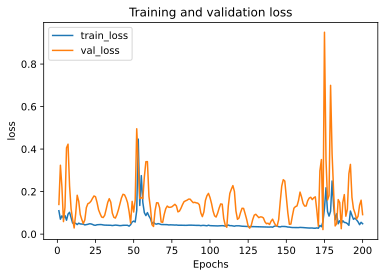

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
def plot_metric(history, metric):
    train_metrics = history.history[metric]
    val_metrics = history.history['val_'+metric]
    epochs = range(1, len(train_metrics) + 1)
    plt.plot(epochs, train_metrics)
    plt.plot(epochs, val_metrics)
    plt.title('Training and validation '+ metric)
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend(["train_"+metric, 'val_'+metric])
    plt.show()
plot_metric(history, 'loss')

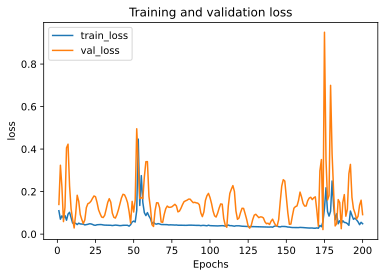

In [13]:
plot_metric(history, 'loss')


In [14]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping() # by default, monitor='val_loss' and patience=1

In [15]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0488 - accuracy: 0.9889 - val_loss: 0.0416 - val_accuracy: 0.9667
Epoch 2/200
3/3 - 0s - loss: 0.0503 - accuracy: 0.9889 - val_loss: 0.1642 - val_accuracy: 0.9333


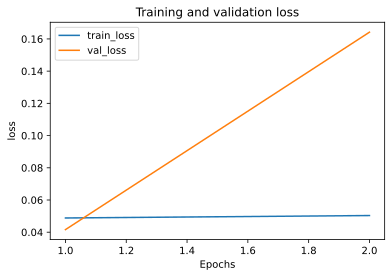

In [16]:
plot_metric(history, 'loss')


In [17]:
custom_early_stopping = EarlyStopping(
    monitor='val_accuracy', 
    patience=8, 
    min_delta=0.001, 
    mode='max'
)

In [18]:
history = model.fit(
    X_train, 
    y_train, 
    epochs=200, 
    validation_split=0.25, 
    batch_size=40, 
    verbose=2,
    callbacks=[custom_early_stopping]
)

Epoch 1/200
3/3 - 0s - loss: 0.0528 - accuracy: 0.9889 - val_loss: 0.3393 - val_accuracy: 0.9000
Epoch 2/200
3/3 - 0s - loss: 0.1153 - accuracy: 0.9667 - val_loss: 0.3884 - val_accuracy: 0.8667
Epoch 3/200
3/3 - 0s - loss: 0.1081 - accuracy: 0.9667 - val_loss: 0.3375 - val_accuracy: 0.8667
Epoch 4/200
3/3 - 0s - loss: 0.0900 - accuracy: 0.9667 - val_loss: 0.2313 - val_accuracy: 0.9000
Epoch 5/200
3/3 - 0s - loss: 0.0724 - accuracy: 0.9667 - val_loss: 0.1650 - val_accuracy: 0.9000
Epoch 6/200
3/3 - 0s - loss: 0.0690 - accuracy: 0.9667 - val_loss: 0.1119 - val_accuracy: 0.9333
Epoch 7/200
3/3 - 0s - loss: 0.0657 - accuracy: 0.9889 - val_loss: 0.1008 - val_accuracy: 0.9333
Epoch 8/200
3/3 - 0s - loss: 0.0622 - accuracy: 0.9889 - val_loss: 0.0942 - val_accuracy: 0.9333
Epoch 9/200
3/3 - 0s - loss: 0.0557 - accuracy: 0.9889 - val_loss: 0.0943 - val_accuracy: 0.9333
Epoch 10/200
3/3 - 0s - loss: 0.0488 - accuracy: 0.9889 - val_loss: 0.1075 - val_accuracy: 0.9333
Epoch 11/200
3/3 - 0s - loss:

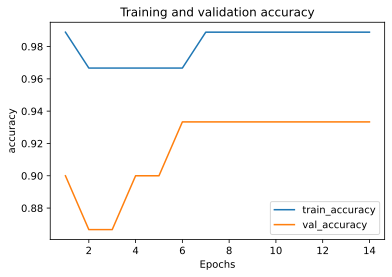

In [19]:
plot_metric(history, 'accuracy')
